<center>
<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/AB.jpeg?raw=true" height="200"> 

# Андан на экономе: домашнее задание 4 
## Проверка гипотез и А/Б-тестирование
</center>


**ФИО:** Литасов Александр Сергеевич

**id из контеста:**

## Общая информация


__Дата выдачи:__ 17.05.2023

__Мягкий дедлайн:__ 23:59MSK 09.06.2023

__Жесткий дедлайн:__ 23:59MSK 16.06.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. 

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-04-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

In [2]:
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 4)

# Часть 1: Процедура проверки гипотез

Для начала повторим теорию проверки гипотез и поотвечаем на различные вопросы. 

> Ниже вас ждут несколько примеров гипотез, на которые вам нужно получить статистически значимые ответы. Вы можете пользоваться встроенными функциями тестов, можете писать свои, а можете использовать с семинаров – это не влияет на полученные баллы. Вы также оставляете за собой право выбрать, проверять гипотезу через `p-value` или по критическим точкам или вообще по доверительным интервалам (но здесь будьте осторожнее, особенно, когда у вас 2 выборки). 

__Здесь важно:__

- Правильно посчитать `p-value` либо наблюдаемое значение критерия (либо дов. интервал);
- Правильно сделать вывод об отвержении / не отвержении нулевой гипотезы;
- Правильно выбрать тест для проверки и обосновать, почему вы выбрали именно его.

Гипотезы проверяйте на $5\%$ уровне значимости

## Задача №1: Экзамен

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/exam.jpeg?raw=true" width="400" align='left'>

У вас есть набор данных об оценках студентов на экзамене. Каждая строка в датасете – отдельный студент. Датасет представляет собой следующие колонки:

* `gender` – пол
* `race/ethnicity` – раса / этническая принадлежность
* `parental level of education` – уровень образования
* `lunch` – получает ли бесплатные обеды (тип питания)
* `test preparation course` – прошел ли курсы по подготовке к тесту
* `math score` – баллы за математику
* `reading score` – баллы за чтение
* `writing score` – баллы за письменность

In [4]:
df = pd.read_csv('students_exam.csv')

In [5]:
df_high = df[df['parental level of education'].isin(["associate's degree", "bachelor's degree", "master's degree"])]
df_middle = df[df['parental level of education'].isin(["high school", "some high school", "some college"])]

__а)__ __[5 баллов]__  Проверьте гипотезу о том, что студенты, получившие высшее образование (associate's degree, bachelor's degree, master's degree) в среднем пишут математику на большее число баллов, чем студенты со средним образованием (high school, some high school, some college). 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{high} = \mu_{middle} \\
& H_1: \mu_{high} > \mu_{middle}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: студенты с высшим образованием и со средним. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

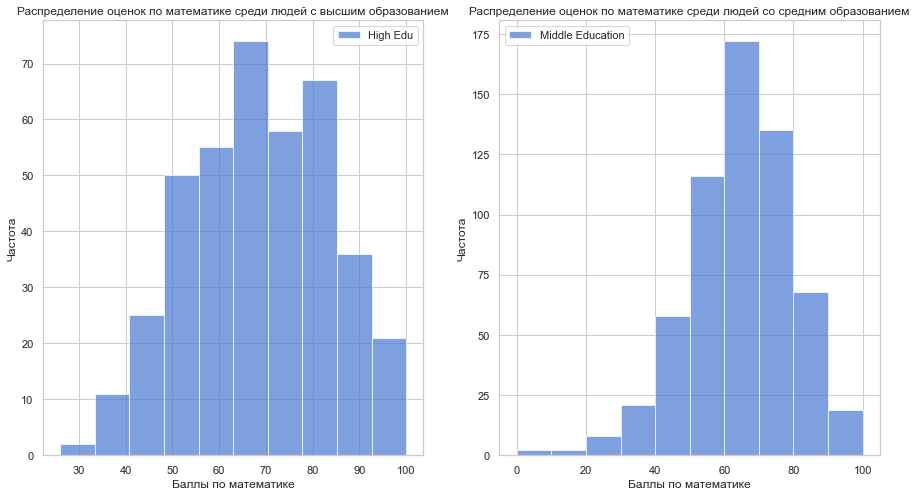

Видно, что распределения похожи на нормальные --> можно использовать t-тест


In [6]:
import matplotlib.pyplot as plt

# Оценим похожесть распределений на нормальные для использования их в t-тесте
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.hist(df_high['math score'], label='High Edu', alpha=0.7)
ax1.set_xlabel('Баллы по математике')
ax1.set_ylabel('Частота')
ax1.set_title('Распределение оценок по математике среди людей с высшим образованием')
ax1.legend()


ax2.hist(df_middle['math score'], label='Middle Education', alpha=0.7)
ax2.set_xlabel('Баллы по математике')
ax2.set_ylabel('Частота')
ax2.set_title('Распределение оценок по математике среди людей со средним образованием')
ax2.legend()

plt.show()

print('Видно, что распределения похожи на нормальные --> можно использовать t-тест')


In [7]:
var_high = df_high['math score'].var()
var_middle = df_middle['math score'].var()

print("Дисперсия с высшим образованием - ", var_high)
print("Дисперсия со средним образованием - ", var_middle)
print("Дисперсии почти равны --> можно использовать t-тест")

Дисперсия с высшим образованием -  226.5915416682412
Дисперсия со средним образованием -  225.51056017748186
Дисперсии почти равны --> можно использовать t-тест


In [8]:
from scipy.stats import ttest_ind

In [9]:
# Используем правосторонний t-тест для проверки гипотезы
_, p_value = ttest_ind(df_high['math score'], df_middle['math score'], alternative='greater')

if p_value < 0.05:
    print("Нулевая гипотеза отвергается. Матожидание_1 > Матожидание_2")
else:
    print("Нулевая гипотеза не отвергается. Матожидания равны")

Нулевая гипотеза отвергается. Матожидание_1 > Матожидание_2


__Результат__ : Мы отвергаем нулевую гипотезу о равенстве матожиданий и принимаем гипотезу о том, что что студенты, получившие высшее образование (associate's degree, bachelor's degree, master's degree) в среднем пишут математику на большее число баллов, чем студенты со средним образованием (high school, some high school, some college)    

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ 

1. t-тест более гибкий и менее чувствителен к предпосылке о нормальности распределений и равенстве дисперсий, чем параметрические тесты (например, t-тест), поэтому именно он был выбран для теста. Был выбран правосторонний t-тест




2. Предпосылки t-теста
- Распределение должно быть приближенно к нормальному (выполнено)
- Дисперсии должны быть примерно равны (выполнено)
- Независимость выборок (выполнено, так как люди получившие разные образования - это разные люди)




__б)__ __[5 баллов]__  Правда ли что в среднем студенты пишут экзамен по `reading` так же, как и по `math`? 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{math} = \mu_{reading} \\
& H_1: \mu_{math} \neq \mu_{reading}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: баллы по чтению и баллы по математике. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

In [10]:
df_math = df['math score']
df_reading = df['reading score']

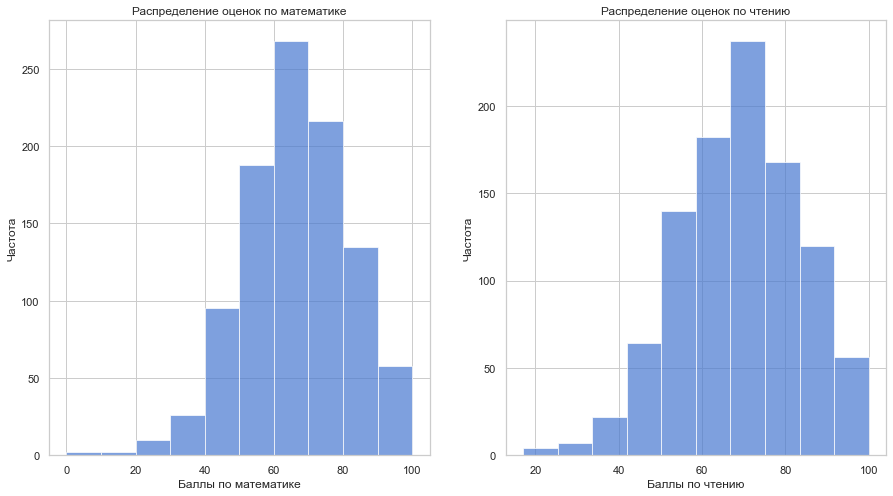

In [11]:
# Оценим похожесть распределений на нормальные для использования их в t-тесте
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.hist(df_math, label='Math Score', alpha=0.7)
ax1.set_xlabel('Баллы по математике')
ax1.set_ylabel('Частота')
ax1.set_title('Распределение оценок по математике')

ax2.hist(df_reading, label='Reading Score', alpha=0.7)
ax2.set_xlabel('Баллы по чтению')
ax2.set_ylabel('Частота')
ax2.set_title('Распределение оценок по чтению')

plt.show()


In [12]:
# проверка равенства дисперсий 
print(np.var(df_math))
print(np.var(df_reading))
print("Дисперсии близки к тому, чтобы быть равными")

229.68907900000048
212.9524390000001
Дисперсии близки к тому, чтобы быть равными


In [13]:
from scipy.stats import ttest_rel

df_math = df['math score']
df_reading = df['reading score']

_, p_value = ttest_rel(df_math, df_reading)

if p_value < 0.05:
    print("Нулевая гипотеза отвергается. Матожидания не равны")
else:
    print("Нулевая гипотеза не отвергается. Матожидания равны")

Нулевая гипотеза отвергается. Матожидания не равны


__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ 

1. В данном случае у нас каждый человек писал математику и чтение, поэтому мы можем использовать парный тест. Парный t-test был выбран по причине того, что он хорошо справляется с зависимыми выборками с почти нормальным распределением

2. Предпосылки выполнены
- Данные приближены к нормальному распределению
- Выборка парная
- Дисперсии различны, но близки

## Задача №2:  О мышах и людях

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/vagon.jpeg?raw=true" width="400" align='left'>

Для изучения аспектов процесса принятия моральных решений психологи уже много лет используют этические дилеммы, с помощью которых оценивают действия людей в гипотетических ситуациях. Один из самых известных примеров — это [проблема вагонетки,](https://ru.wikipedia.org/wiki/Проблема_вагонетки) в которой необходимо принять решение о том, стоит ли пожертвовать одним человеком для спасения пятерых.

Бельгийские психологи воплотили дилемму в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с $20$-секундным таймером: участникам сообщили, что по истечении этих $20$ секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей. 

Удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только $12$ участников). В решении реальной проблемы вагонетки приняли участие $192$ человека, а еще $83$ решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации. 

В файле `mouse.csv` лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы: 

* __STUDY:__ какую проблему вагонетки решал человек $1$, если на бумаге и $2$, если реальную
* __AGE:__ возраст респондента 
* __GENDER:__ пол респондента
* __DECISION:__ решение дилеммы ($1$ - жать на кнопу, $0$ - не жать) 
* __RT:__ время, которое респондент потратил, чтобы нажать на кнопку 

Подробное описание данных, сами данные и даже код на R, использованный при оценивании моделей, можно найти в [репозитории исследования.](https://osf.io/kvb99/) В статье авторы строили несколько логистических регрессий, чтобы очистить эффект от психологических особенностей респондентов. Про подобные приёмы очистки мы немного поговорим позже.  Также более подробно про исследование [можно почитать на N + 1.](https://nplus1.ru/news/2018/05/11/mice-trolley)

In [14]:
df = pd.read_csv('mouse.csv', sep='\t')

# отбираем нужные колонки
df = df[['STUDY', 'AGE', 'GENDER', 'DECISION', 'RT']]

# удаляем пропуски по колонке DECISION (то есть тех, кто не смог принять решение)
df = df[~df.DECISION.isnull()]

__а)__ __[5 баллов]__ Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чаще принимают решение нажать кнопку: в реальной или на бумаге?

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{(На бумаге и в реальности жмут на кнопку одинаково часто)} \\
&H_1: \hspace{2mm} p_1 > p_2  \hspace{2mm} \text{(На бумаге на кнопку жмут чаще)}
\end{aligned}
$$

In [15]:
group1 = df[df['STUDY'] == 1]['DECISION']
group2 = df[df['STUDY'] == 2]['DECISION']

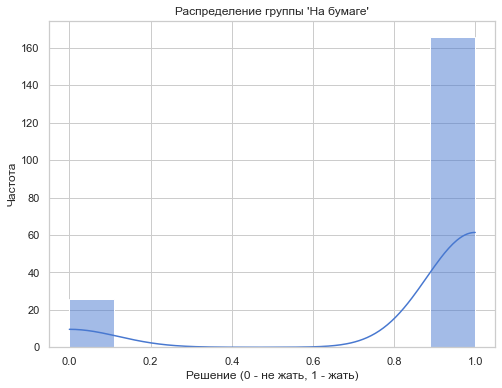

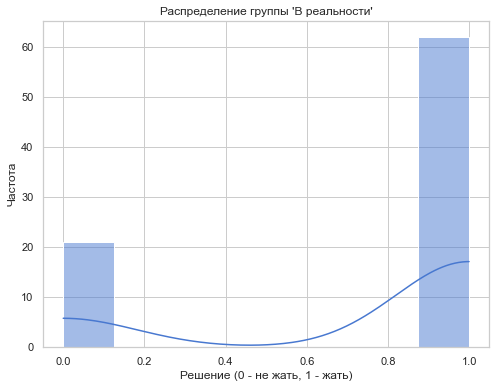

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация распределения группы "На бумаге"
plt.figure(figsize=(8, 6))
sns.histplot(group1, kde=True)
plt.title("Распределение группы 'На бумаге'")
plt.xlabel("Решение (0 - не жать, 1 - жать)")
plt.ylabel("Частота")
plt.show()

# Визуализация распределения группы "В реальности"
plt.figure(figsize=(8, 6))
sns.histplot(group2, kde=True)
plt.title("Распределение группы 'В реальности'")
plt.xlabel("Решение (0 - не жать, 1 - жать)")
plt.ylabel("Частота")
plt.show()


In [17]:
import numpy as np
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(group1, group2, alternative='greater')

if p_value < 0.05:
    print("Нулевая гипотеза отвергается. На бумаге жмут чаще")
else:
    print("Нулевая гипотеза не отвергается")


Нулевая гипотеза отвергается. На бумаге жмут чаще


__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ 

1. Критерий Манна-Уитни был выбран потому что он непараметрический позволяет работать с не похожими на нормальные распределениями

2. Предпосылки
- Независимость (в выборках участвуют разные люди --> выполнено)
- Гомогенность распределений (выполнено)

__б)__ __[5 баллов]__  Кровожадные люди быстро берут на себя ответственность за удар мышки током. Будем считать, что кровожадные люди принимают решение менее, чем за пять секунд. Правда ли, что люди по своей природе кровожадные? 

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu \le 5 \hspace{2mm} \text{(Люди кровожадны)} \\
&H_1: \hspace{2mm} \mu > 5  \hspace{2mm} \text{(Люди не кровожадны)}
\end{aligned}
$$

In [18]:
from scipy.stats import ttest_1samp

df_RT = df['RT'].dropna()

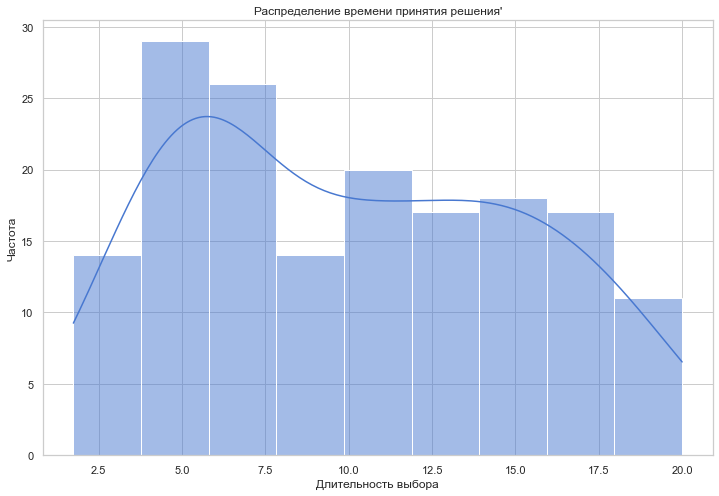

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация распределения группы "На бумаге"
plt.figure(figsize=(12, 8))
sns.histplot(df_RT, kde=True)
plt.title("Распределение времени принятия решения'")
plt.xlabel("Длительность выбора")
plt.ylabel("Частота")
plt.show()

In [20]:
_, p_value = ttest_1samp(df_RT, 5, alternative='greater')

if p_value < 0.05:
    print("Нулевая гипотеза отвергается. Люди не кровожадны")
else:
    print("Нулевая гипотеза не отвергается. Люди кровожадны")

Нулевая гипотеза отвергается. Люди не кровожадны


__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ 

1. Для проверки гипотезы был выбран одновыборочный t-тест, так как в этот раз у нас всего одна выборка

2. Предпосылки
- Приближенность данных к нормальному распределению (из графика можно сказать, что выполнено)
- Независимость наблюдений (выполнено)

## Задача №3:  Парадокс

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='left'>

Помимо решения задач и применения различных функций из библиотек необходимо очень аккуратно работать с данным и понимать, какие действия корректны, а какие нет. Перед вами результаты медицинских исследований: 

- из $1650$ мужчин, принимавших лекарство, выздоровели $770$, 
- из $223$ мужчин, не принимавших лекарство, выздоровели $88$,
- из $245$ женщин, принимавших лекарство, выздоровели $165$,
- из $750$ женщин, не принимавших лекарство женщин, выздоровели $440$.

Необходимо найти ответы на следующие вопросы: 

1. Влияет ли лекарство на мужчин?
2. Влияет ли лекарство на женщин? 
3. Влияет ли лекарство на людей обоих полов в целом?

Будем считать, что исследование проводилось методом двойного слепого тестирования. Врач не знал, даёт ли он пациенту плацебо или лекарство, пациент не знал, пьёт ли он плацебо или лекарство. 

Запишем данные в табличку. Пусть $A$ — принимавшие лекарство, $\overline{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\overline{B}$ — не выздоровевшие.

<!--<img width="60%" src="pics/pic2.png">-->
<table>
<tr><td>
    
|Мужчины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 770 | 880 |
|$\overline{A}$| 88 | 135 |

</td><td>
    
|Женщины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 165 | 80 |
|$\overline{A}$| 440 | 310 |

</td><td>

|Вместе| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 935 | 960 |
|$\overline{A}$| 528 | 445 |

</td></tr> </table>

In [21]:
import numpy as np

Для решения задачи воспользуйтесь критерием хи-квадрат Пирсона. Мы его не разбирали на семинарах, однако на курсе матстата он у вас был. Вспомнить как он работает можно [в этом видео.](https://www.youtube.com/watch?v=bws1CB9XZ6E&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=10) Посмотреть на код можно [в этом видео.](https://www.youtube.com/watch?v=H3NtBN_o-hk&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=12) Тетрадку с кодом можно [найти тут.](https://github.com/FUlyankin/matstat-AB/blob/main/week10_nonparam_bootstrap/04_05_python_kolmogorov_pearson.ipynb)

Тест поможет нам понять, есть ли у лекарства какой-то эффект. Применить тест в python помогает функция `chi2_contingency` из пакета `scipy.stats`. Используйте её с параметром `correction=False`.

__а)__ __[5 баллов]__ Давайте попробуем найти ответ на вопрос, есть ли эффект от лекарства для мужчин? 

Давайте предварительно посчитаем долю выздровевших мужчин, которые принимали лекарство и долю выздровевших мужчин, которые не принимали лекартсво. Сравните эти доли.

In [22]:
# (◕‿◕)♡

Создадим матрицу размера $2 \times 2.$ Внесём в неё частоты, полученные для мужчин.

In [23]:
men = np.array([[770,880],[88,135]])

In [24]:
recovery_injected = men[0, 0] / np.sum(men[0, :])
recovery_not_injected = men[1, 0] / np.sum(men[1, :])

if recovery_injected> recovery_not_injected:
    print("Доля вызоровевших после принятия лекарства выше, чем просто доля выздоровевших")
else:
    print("Доля вызоровевших после принятия лекарства не выше, чем просто доля выздоровевших")


Доля вызоровевших после принятия лекарства выше, чем просто доля выздоровевших


Примените тест с параметром `correction=False` и сделайте выводы на уровне значимости $5\%.$

In [25]:
from scipy.stats import chi2_contingency

In [26]:
chi2, p_value, _, matrix = chi2_contingency(men, correction=False)

if p_value < 0.05 :
    print("Нулевая гипотеза отвергается. Эффект от лекарства для мужчин есть.")
else:
    print("Нулевая гипотеза не отвергается. Эффекта от лекарства на мужчин нет.")

matrix # теоретическая матрица


Нулевая гипотеза отвергается. Эффект от лекарства для мужчин есть.


array([[755.84623599, 894.15376401],
       [102.15376401, 120.84623599]])

__б)__ __[10 баллов]__ Сделайте всё то же самое, но руками, без помощи библиотеки.

Для того, чтобы расчитать тестовую стаститику хи-квадрат, нам необходимо найти матрицу ожидаемых частот, такую же, которая у нас получилась в предыдущем пункте в output-е функции `chi2_contingency`. 

Используя матрицу из предыдущего пункта, посчитайте общее количество испытуемых мужчин.

In [27]:
total_men = np.sum(men)
total_men

1873

Посчитайте отдельно количество испытуемых мужчин, которые принимали лекарство, и которые не принимали его $(n1, n2)$

In [28]:
n1 = np.sum(men, axis = 1)[0]
n2 = np.sum(men, axis = 1)[1]

print(n1, n2)

1650 223


Найдите вероятности выздороветь или нет (независимо от группы по приему/не приему лекарства), то есть вероятность попасть в $B$ и $\overline{B}$ для мужчин.

In [29]:
P_B = np.sum(men, axis = 0)[0]/total_men
P_not_B = np.sum(men, axis = 0)[1]/total_men
P_B # вероятность выздороветеь

0.4580886278697277

Расчитайте ожидаемые (теоритические) значения для каждой ячейки матрицы. Для этого перемножьте вероятности из предыдущего пункта со значениями $n_1$ и $n_2$. Полученную матрицу можно сравнить с выводом библиотеки`scipy.stats`, она должна быть идентичной.

In [30]:
expected = np.outer(np.array([n1, n2]), np.array([P_B, P_not_B]))

print("Теоретические значения для каждой ячейки матрицы")
print(expected)

Теоретические значения для каждой ячейки матрицы
[[755.84623599 894.15376401]
 [102.15376401 120.84623599]]


Расчитайте наблюдаемую статистику и найдите `p_value` с помощью `sts.chi2.cdf` с параметром `df=1`.

\begin{equation*} \chi^2_d = \sum {\frac {(O-E)^2}{E}},\end{equation*}

где

- $E$ - наши ожидаемые частоты(матрица из предыдущего пукта),
- $O$ - наблюдаемы частоты(первоначальная матрица).

In [31]:
from scipy.stats import chi2

In [32]:
chi2_obs = np.sum((men - expected)**2 / expected)
p_value = 1 - chi2.cdf(chi2_obs, df=1)

p_value

if p_value < 0.05 :
    print("Нулевая гипотеза отвергается. Эффект от лекарства для мужчин есть.")
else:
    print("Нулевая гипотеза не отвергается. Эффекта от лекарства на мужчин нет.")

p_value

Нулевая гипотеза отвергается. Эффект от лекарства для мужчин есть.


0.04268446899604583

__в)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для женщин? (повторите процедуру пункта а) 

Как и в предыдущий раз, для начала, посчитайте долю выздровевших женщин, которые принимали лекарство и долю выздровевших женщин, которые не принимали лекартсво. Сравните эти доли.

In [33]:
women = np.array([[165,80],[440,310]])

In [34]:
recovery_injected = women[0, 0] / np.sum(women[0, :])
recovery_not_injected = women[1, 0] / np.sum(women[1, :])

if recovery_injected> recovery_not_injected:
    print("Доля вызоровевших после принятия лекарства выше, чем просто доля выздоровевших")
else:
    print("Доля вызоровевших после принятия лекарства не выше, чем просто доля выздоровевших")


Доля вызоровевших после принятия лекарства выше, чем просто доля выздоровевших


Создайте матрицу с данными из таблицы по женщинам, примените тест с параметром `correction=False` и сделайте выводы на уровене значимости $5\%$.

In [35]:
chi2, p_value, _, _ = chi2_contingency(women, correction=False)

if p_value < 0.05 :
    print("Нулевая гипотеза отвергается. Эффект от лекарства для женщин есть.")
else:
    print("Нулевая гипотеза не отвергается. Эффекта от лекарства на женщин нет.")

p_value

Нулевая гипотеза отвергается. Эффект от лекарства для женщин есть.


0.015679686056826774

__г)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для объединенной группы?

In [36]:
total = np.array([[935, 960],[528, 445]])

In [37]:
chi2, p_value, _, _ = chi2_contingency(total, correction=False)

if p_value < 0.05 :
    print("Нулевая гипотеза отвергается. Эффект от лекарства в целом есть.")
else:
    print("Нулевая гипотеза не отвергается. Эффекта от лекарства в целом нет.")

p_value

Нулевая гипотеза отвергается. Эффект от лекарства в целом есть.


0.012492547994073244

Соотносится ли это с результатами по группам мужчин и женщин, взятых отдельно?

In [38]:
????

Object `??` not found.


## Что произошло?

Если вы все сделали правильно, скорее всего у вас получились противоречивые значимые результаты. Давайте разберемся почему это так.

Может произойти такая ситуация, что новое лекарство может оказаться эффективным в каждом из отдельных исследований, на каждой отдельной группе, но объединение результатов укажет на то, что это лекарство либо бесполезно, либо вредно. [Это называется __парадокс Симпсона.__](https://ru.wikipedia.org/wiki/Парадокс_Симпсона) Он довольно часто встречается на практике в разном виде. 

Проблема здесь в том, что объединять эти выборки просто слив данные вместе — нельзя. Контрольные группы людей, не принимавших лекарство, занимают разный объем от выборок — примерно 12% в случае мужчин и 75% в случае женщин.

# Часть 2: А/Б-тестирование

## Задача №4: Не подглядывать!

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов. 

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_ 

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов. 

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны. 

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет также $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [39]:
from scipy import stats

sigma_A = 40
sigma_B = 20
alpha = 0.05
beta = 0.2
MDE = 5

z_alpha = abs(stats.norm.ppf(1 - alpha/2))
z_beta = abs(stats.norm.ppf(1 - beta))
n = round((((sigma_A**2 + sigma_B**2) * (z_alpha + z_beta)**2)) / MDE**2)
n

628

In [40]:
days = n * 2 // 100 +1
print('Число наблюдений - ', n * 2)
print('Число дней - ', days)

Число наблюдений -  1256
Число дней -  13


__б) [25 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [41]:
import numpy as np
from scipy.stats import norm

mu_A = 100
mu_B = 105 
sigma = 40 

rvs_A = norm.rvs(loc=mu_A, scale=sigma, size=100)
rvs_B = norm.rvs(loc=mu_B, scale=sigma, size=100 )

rvs_A, rvs_B


(array([ 59.64692769,  33.4252738 ,  41.53481272, 141.89468903,
         88.30696896,  70.57785689, 134.33139454,  78.98858643,
        127.08783552, 165.36756398,  82.18554492,  87.29120393,
        112.75614541, 127.74414285,  73.21750786,  91.79267978,
         98.0182362 ,  88.08378814, 174.09542308, 108.47376479,
         72.20297894,  70.5793915 , 142.62171686,  64.99733469,
         49.51174608, 134.73116202,  81.39645405,  65.68221795,
         95.79354519,  99.73273411, 106.99913756,  95.73210582,
        157.258504  , 116.3648397 , 107.90864574,  98.21256771,
         92.93565253,  81.53562267, 116.61889003,  80.52463799,
        142.4796681 , 105.40701984, 105.08728459,  73.5062854 ,
        158.95331289,  49.46187977, 150.78720181,  82.9712581 ,
         43.12527482, 144.43885521,  70.07198788,  84.02532891,
        136.8643668 ,  66.18487308, 155.31225451,  -3.66343869,
        135.46818824, 126.52011636, 131.40257605,  72.5964747 ,
         88.53163091, 138.73571104, 195.

2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста: 
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [42]:
from scipy.stats import norm, ttest_ind

In [43]:
def run_AB_test(days):
    mu_A = 100 
    mu_B = 105
    sigma = 40 

    data_A = []
    data_B = []
    means_A = []
    means_B = []
    p_values = []

    for _ in range(days):
        samples_A = norm.rvs(loc= mu_A, scale=sigma, size=100)
        samples_B = norm.rvs(loc=mu_B, scale= sigma, size=100)

        data_A.extend(samples_A)
        data_B.extend(samples_B)
        mean_A = np.mean(data_A)
        mean_B = np.mean(data_B)
        _, p_value = ttest_ind(data_A, data_B)

        means_A.append(mean_A)
        means_B.append(mean_B)
        p_values.append(p_value)

    df = pd.DataFrame({'Mean_A': means_A, 'Mean_B': means_B, 'p-value': p_values})

    return df

df = run_AB_test(days=50)

3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

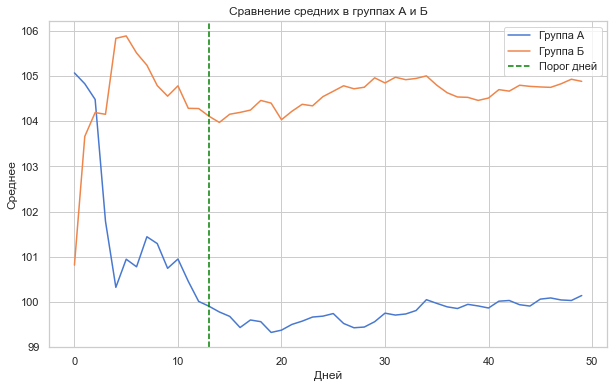

In [44]:
import matplotlib.pyplot as plt

def plt_mean(df):
    plt.figure(figsize = (10,6))
    plt.plot(df.index, df['Mean_A'], label='Группа А')
    plt.plot(df.index, df['Mean_B'], label='Группа Б')

    plt.axvline(x = days, color='green', label='Порог дней', linestyle='dashed')
    
    plt.xlabel('Дней')
    plt.ylabel('Среднее')
    plt.title('Сравнение средних в группах А и Б')
    plt.legend()

    plt.show()
    
plt_mean(df)

4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

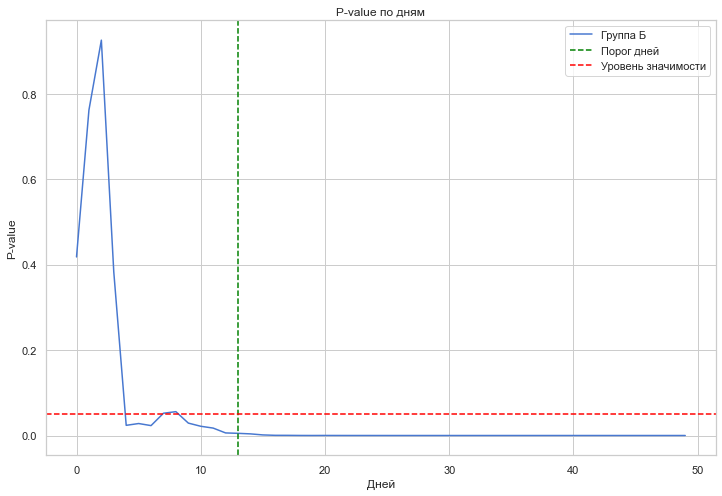

In [45]:
import matplotlib.pyplot as plt

def plt_p_value(df):
    plt.figure(figsize = (12,8))
    plt.plot(df.index, df['p-value'], label='Группа Б')

    plt.axvline(x = days, color='green', label='Порог дней', linestyle='dashed')
    plt.axhline(y = 0.05, color='red', label='Уровень значимости', linestyle='dashed')
    plt.xlabel('Дней')
    plt.ylabel('P-value')
    plt.title('P-value по дням')
    plt.legend()

    plt.show()
    
plt_p_value(df)

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

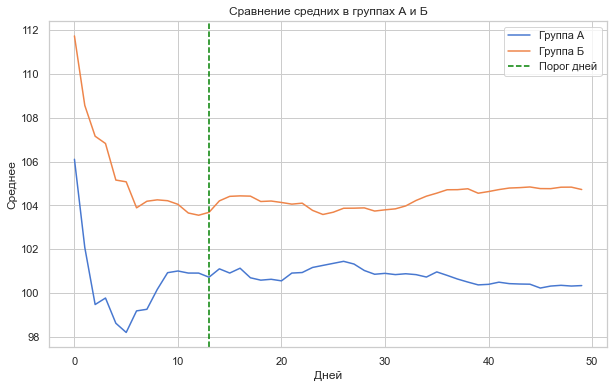

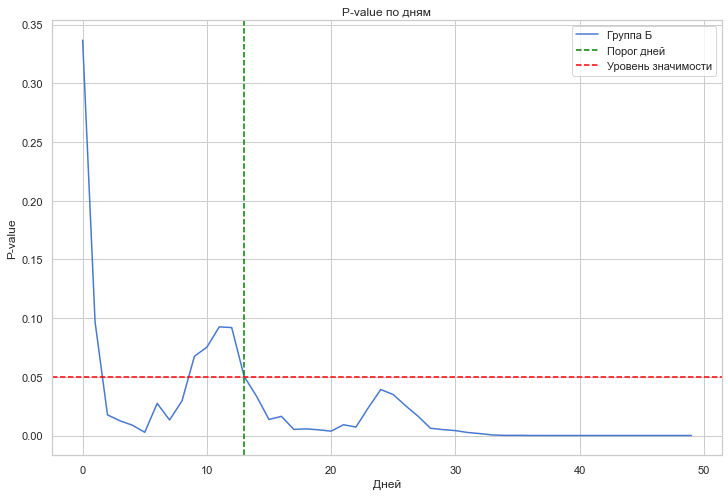

In [46]:
df_1 = run_AB_test(days=50)
plt_mean(df_1)
plt_p_value(df_1)

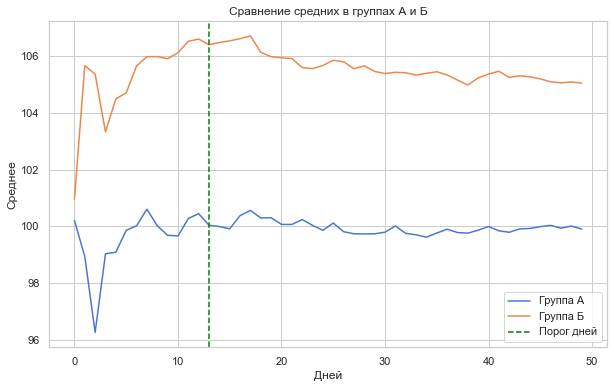

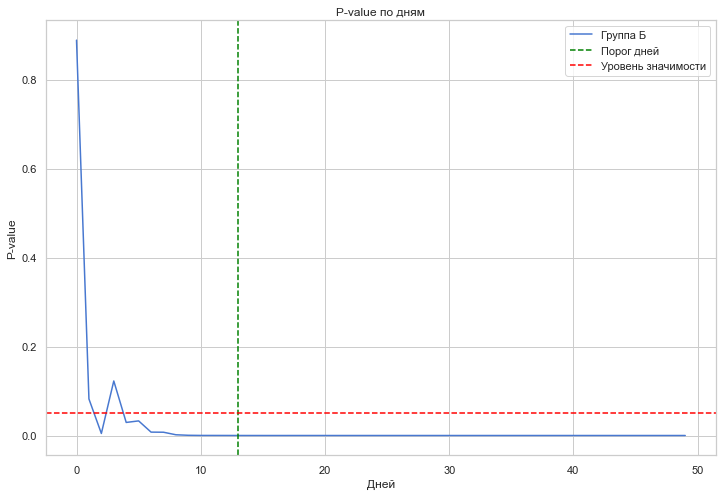

In [47]:
df_2 = run_AB_test(days=50)
plt_mean(df_2)
plt_p_value(df_2)

In [48]:
'''
Из трех графиков можно сделать вывод, что до порога days = 13 средниее и p_value волатильны, при этом p_value высока
Это происходит потому что у нас пока недстаточно данных, чтобы заметить значимый эффект между распределениями
При приближении количеству дней = days p_value в каждом из случаев оказывается ниже порога. Это значит, что нам хватает наблюдений
После количества дней = days p_value закрепляется ни уровне ниже значимости и имеет низкую волатильность 
Это значит, что наш тест теперь уверен в значении p_value
'''
print()

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

In [49]:
def run_AB_test_updated(days):
    mu_A = 100 
    mu_B = 101
    sigma = 40 

    data_A = []
    data_B = []
    means_A = []
    means_B = []
    p_values = []

    for _ in range(days):
        samples_A = norm.rvs(loc= mu_A, scale=sigma, size=100)
        samples_B = norm.rvs(loc=mu_B, scale= sigma, size=100)

        data_A.extend(samples_A)
        data_B.extend(samples_B)
        mean_A = np.mean(data_A)
        mean_B = np.mean(data_B)
        _, p_value = ttest_ind(data_A, data_B)

        means_A.append(mean_A)
        means_B.append(mean_B)
        p_values.append(p_value)

    df = pd.DataFrame({'Mean_A': means_A, 'Mean_B': means_B, 'p-value': p_values})

    return df

df = run_AB_test_updated(days=50)

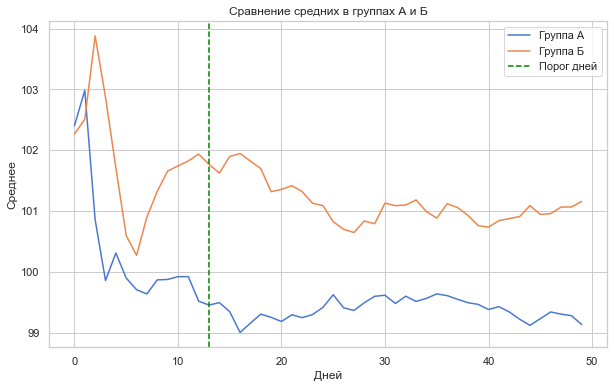

In [50]:
plt_mean(df)

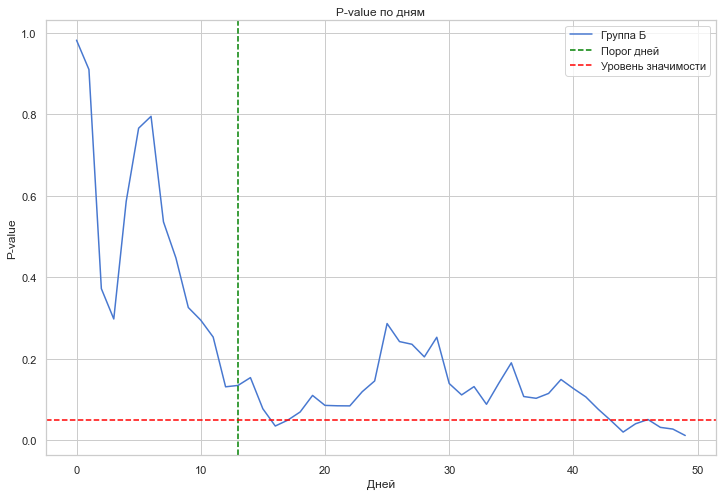

In [51]:
plt_p_value(df)

In [52]:
'''
В данном случае нам не хватает количества дней,чтобы сделать статистически значимый вывод о различных матожиданиях
После порога days = 13 p_value все еще крайне волатилен (как и средние) и не позволяет гооворить о достоверности вывода
'''
print()

__с) [20баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости? 

In [53]:
def run_AB_test(days):
    mu_A = 100 
    mu_B = 100
    sigma = 40 

    data_A = []
    data_B = []
    means_A = []
    means_B = []
    p_values = []

    for _ in range(days):
        samples_A = norm.rvs(loc= mu_A, scale=sigma, size=100)
        samples_B = norm.rvs(loc=mu_B, scale= sigma, size=100)

        data_A.extend(samples_A)
        data_B.extend(samples_B)
        mean_A = np.mean(data_A)
        mean_B = np.mean(data_B)
        _, p_value = ttest_ind(data_A, data_B)

        means_A.append(mean_A)
        means_B.append(mean_B)
        p_values.append(p_value)

    df = pd.DataFrame({'Mean_A': means_A, 'Mean_B': means_B, 'p-value': p_values})

    return df

df = run_AB_test(days=500)

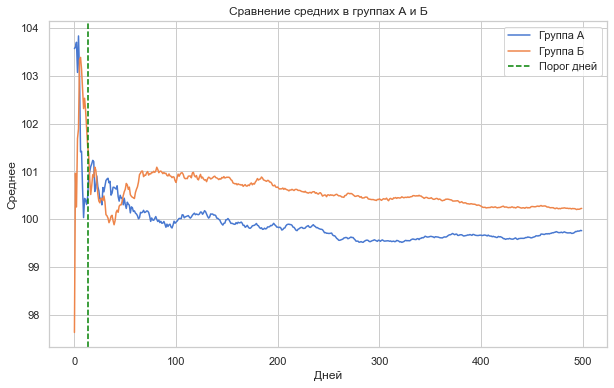

In [54]:
plt_mean(df)

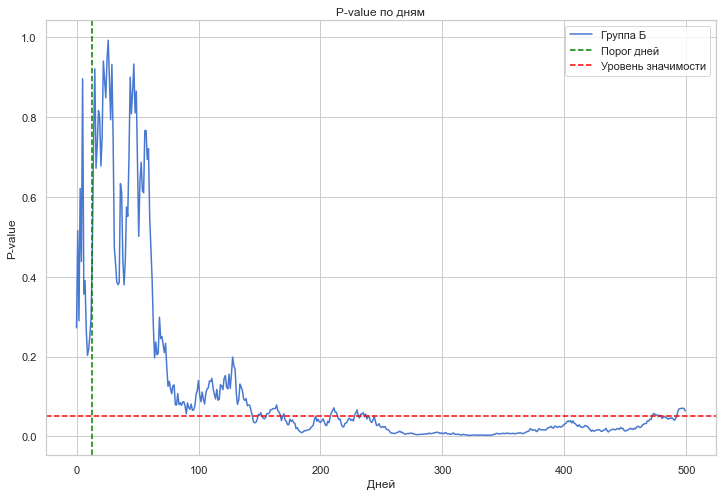

In [55]:
plt_p_value(df)

In [56]:
'''
В данном случае p_value очень волатильно и скачет между 0 и 1
Оно может оказаться < уровня значимости
'''
print()

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите? 

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

In [57]:
def run_AB_test(days):
    mu_A = 100 
    mu_B = 100
    sigma = 40 

    data_A = []
    data_B = []
    means_A = []
    means_B = []
    p_values = []

    for _ in range(days):
        samples_A = norm.rvs(loc= mu_A, scale=sigma, size=100)
        samples_B = norm.rvs(loc=mu_B, scale= sigma, size=100)

        data_A.extend(samples_A)
        data_B.extend(samples_B)
        
        _, p_value = ttest_ind(data_A, data_B)

    return p_value


In [58]:
p_values = []
for _ in range(1000):
    p_values.append(run_AB_test(days = 50))

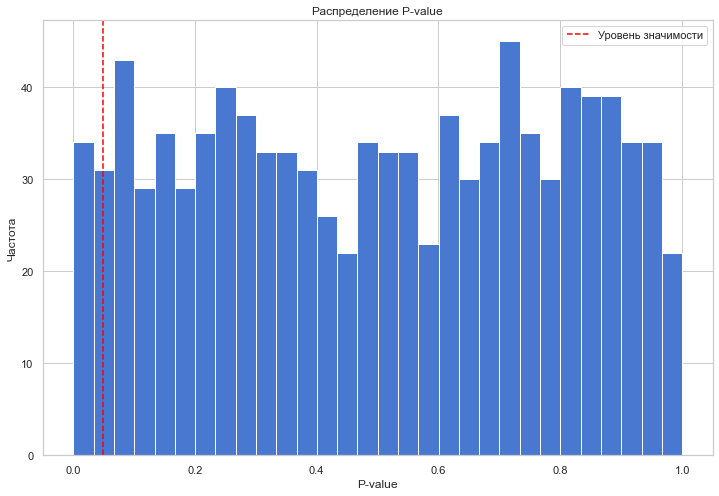

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.hist(p_values, bins=30)
plt.axvline(x=0.05, color='red', label='Уровень значимости', linestyle='dashed')
plt.xlabel('P-value')
plt.ylabel('Частота')
plt.title('Распределение P-value')
plt.legend()
plt.show()


In [60]:
'''
В данном случае p_value распределено равномерно, потому что ему не хватает объема выборки, чтобы хотя бы в какой-то
мере оопределять значимость различий, потому что их нет
'''


'\nВ данном случае p_value распределено равномерно, потому что ему не хватает объема выборки, чтобы хотя бы в какой-то\nмере оопределять значимость различий, потому что их нет\n'